## Real Estates - House Price Prediction

## Read the dataset

In [1]:
import pandas as pd
housing=pd.read_csv("data.csv")
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
housing.shape

(506, 14)

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

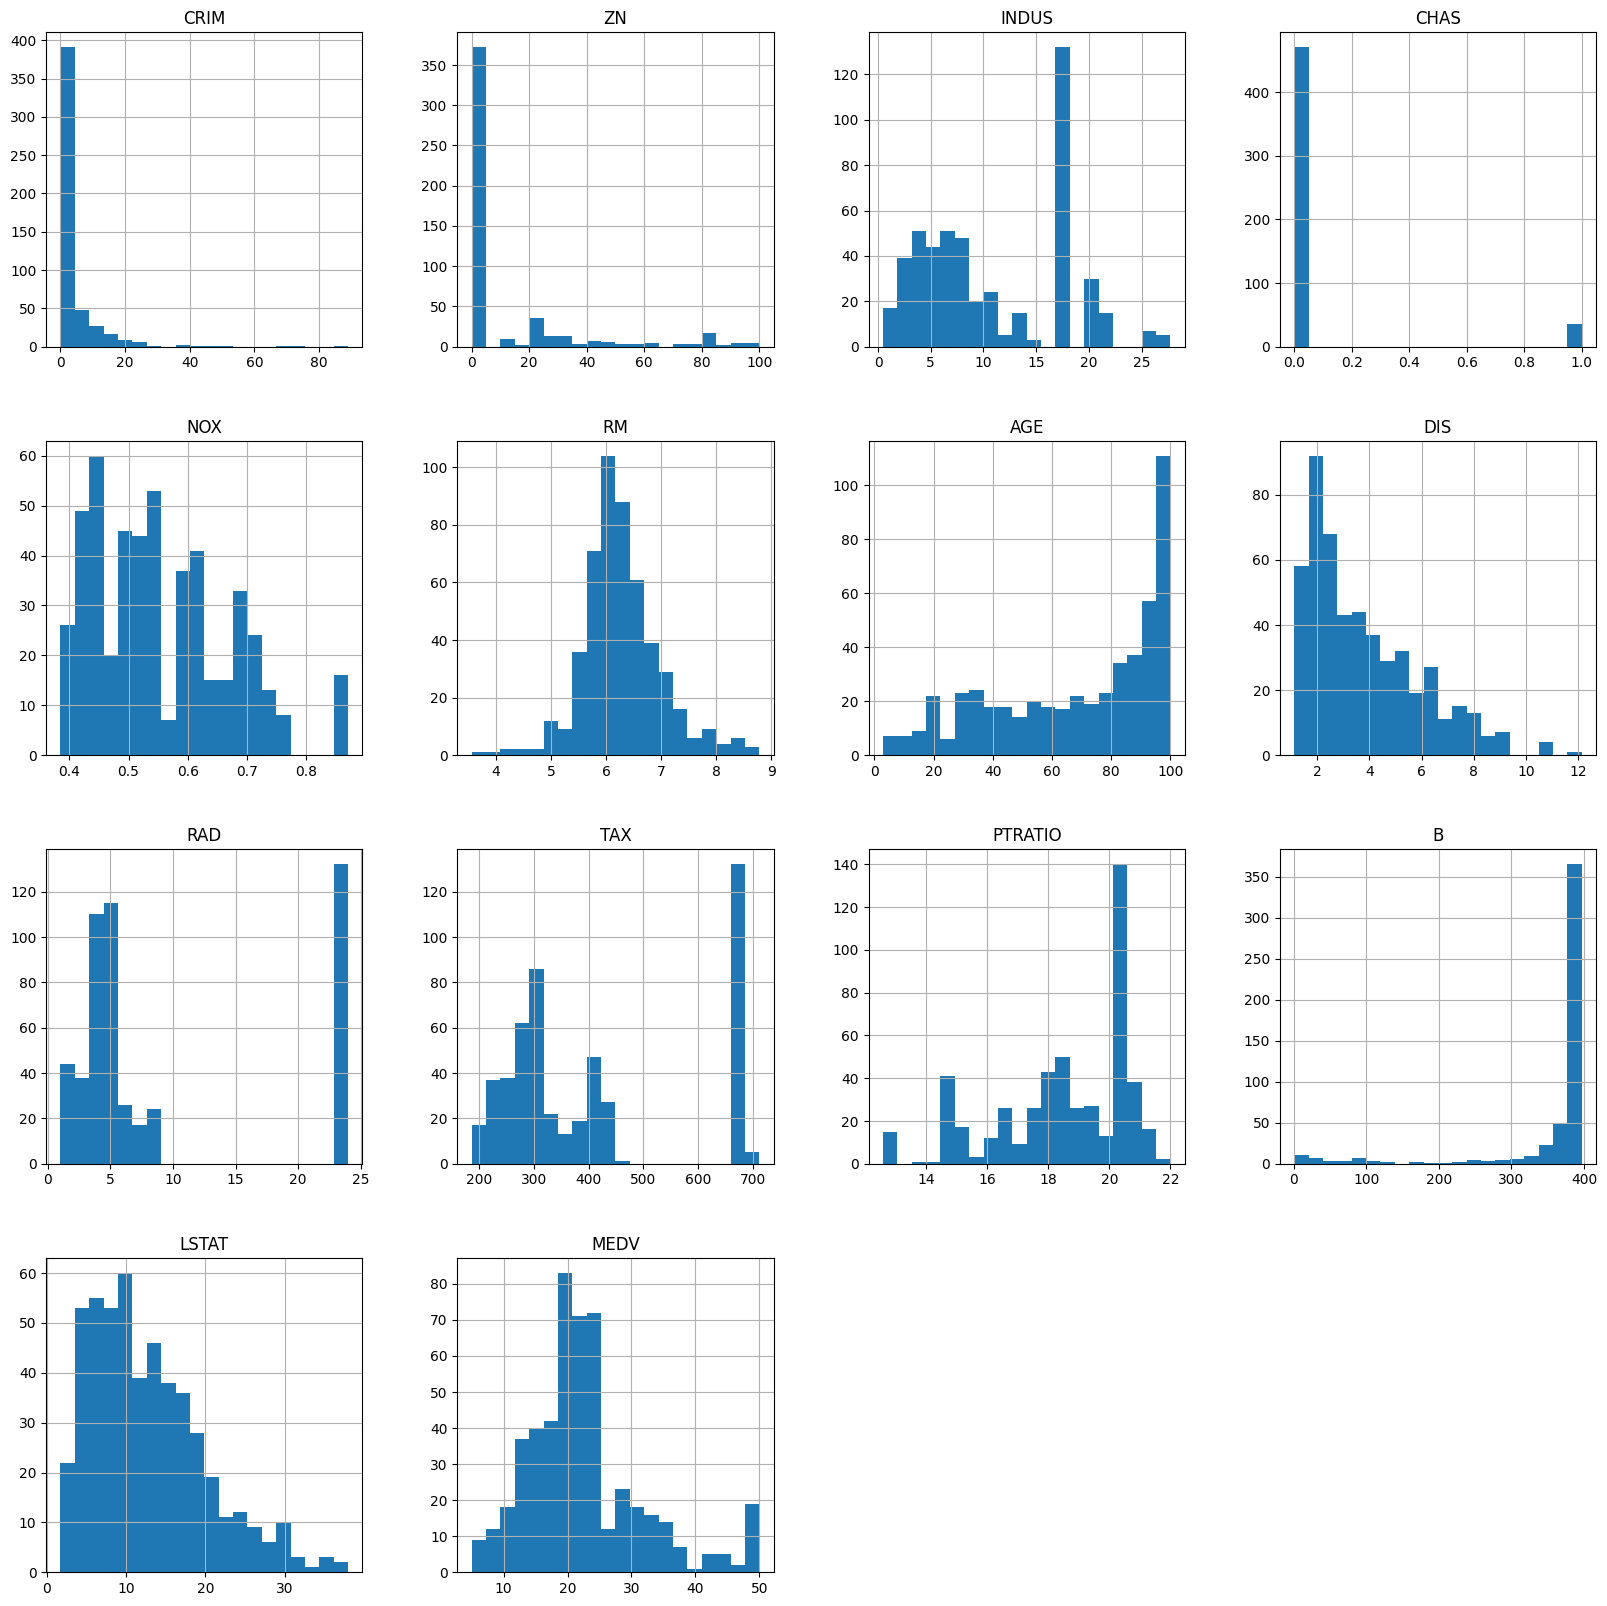

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=20, figsize=(20,20))

## Split into Train and Test datasets

In [6]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_size = int(test_ratio*len(data))
    trainIndices = shuffled[test_size:]
    testIndices = shuffled[:test_size]
    return data.iloc[trainIndices],data.iloc[testIndices]
train_set, test_set = split_train_test(housing, 0.2)

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [7]:
# print("Rows in train set : ",len(train_set))
# print("Rows in test set : ",len(test_set))

In [8]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
# print("Rows in train set : ",len(train_set))
# print("Rows in test set : ",len(test_set))

In [9]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

## Splitting using StratifiedShuffleSplit

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
sss=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for trainIndex, testIndex in sss.split(housing, housing['CHAS']):
    strat_train_set=housing.loc[trainIndex]
    strat_test_set=housing.loc[testIndex]

In [11]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [12]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [13]:
376/28

13.428571428571429

In [14]:
95/7

13.571428571428571

## Analysing Correlations

In [15]:
corr_matrix = housing.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219433,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311173,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.394193,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091468,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302751,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219433,0.311173,-0.394193,0.091468,-0.302751,1.000000,-0.240286,0.203507,-0.210718,-0.292794,-0.357612,0.128107,-0.615721,0.696169
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240286,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.203507,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.210718,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292794,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [16]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.696169
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

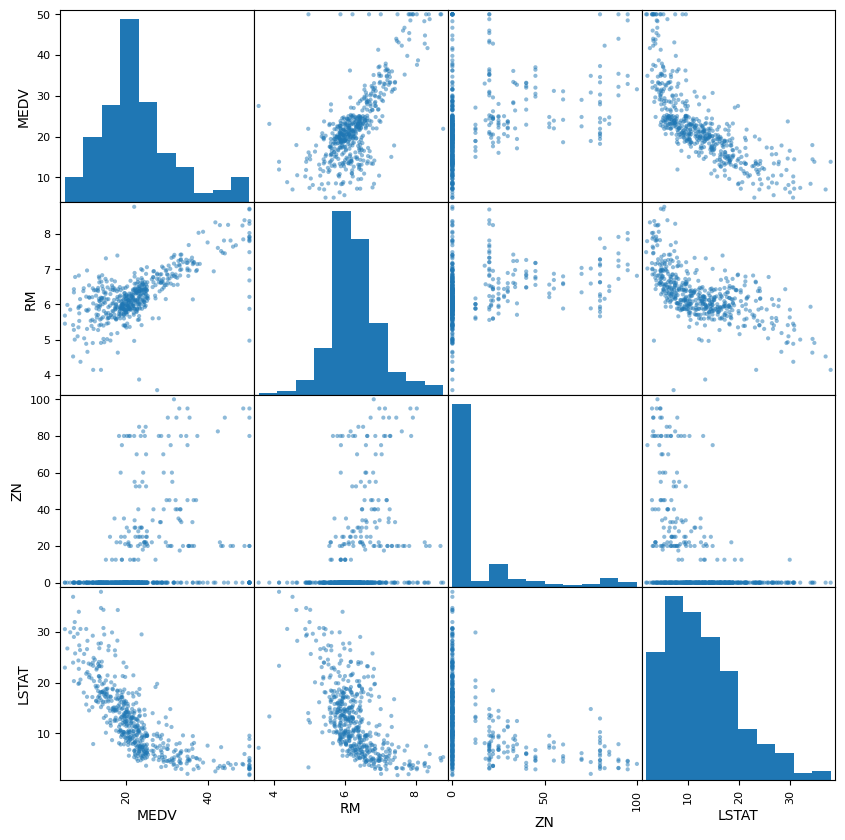

In [17]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize=(10,10))

<Axes: xlabel='RM', ylabel='MEDV'>

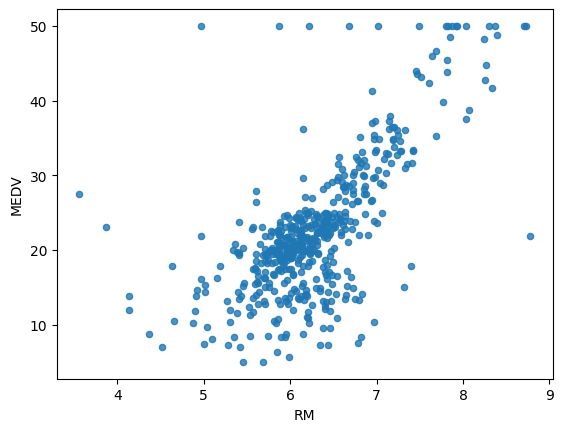

In [18]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

In [19]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels = strat_train_set["MEDV"]

## Handling Missing Values

1. Remove data points
2. Remove whole attribute
3. Fill missing values to some values

In [20]:
# option1
housing.dropna().shape

(399, 13)

In [21]:
#option2
housing.drop("RM", axis=1).shape

(404, 12)

In [22]:
#option3
median = housing["RM"].median()
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

## Filling missing values with median using SimpleImputer

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [24]:
#calculates every attribute median
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [25]:
X = imputer.transform(housing)
housing_categories = pd.DataFrame(X, columns=housing.columns)

In [26]:
housing_categories.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Feature Scaling using MinMaxScaler

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(housing_categories)
housing_categories = pd.DataFrame(X, columns=housing_categories.columns)

In [28]:
housing_categories.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.048913,0.108366,0.392776,0.069307,0.350754,0.520714,0.681152,0.237941,0.379789,0.430041,0.608141,0.890294,0.313805
std,0.110154,0.221506,0.254734,0.254290,0.242479,0.136495,0.291022,0.190877,0.379620,0.321894,0.236583,0.242244,0.205269
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001097,0.000000,0.164815,0.000000,0.132780,0.444098,0.432029,0.082421,0.130435,0.185115,0.488889,0.943813,0.145177
50%,0.003814,0.000000,0.339259,0.000000,0.309129,0.507377,0.775489,0.181197,0.173913,0.286260,0.666667,0.985009,0.279149
75%,0.050669,0.125000,0.642963,0.000000,0.502075,0.588044,0.939238,0.361084,1.000000,0.914122,0.800000,0.996798,0.436099
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Selecting Best Model

In [29]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(housing_categories, housing_labels)

LinearRegression()

In [30]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(housing_categories, housing_labels)

DecisionTreeRegressor()

In [31]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(housing_categories, housing_labels)

RandomForestRegressor()

## Evaluating Models - Cross Validation Score

## Linear Regressor

In [32]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, housing_categories, housing_labels, scoring="neg_mean_squared_error", cv=5) 
lr_scores = np.sqrt(-lr_scores)
lr_scores

array([4.21554054, 4.47792731, 4.98595284, 6.34383266, 5.28161956])

In [33]:
def print_scores(scores):
    print("Mean: ",scores.mean())
    print("Standard Deviation: ",scores.std())

In [34]:
print_scores(lr_scores)

Mean:  5.060974580124906
Standard Deviation:  0.7422587369479199


## Decision Tree Regressor

In [35]:
dtr_scores = cross_val_score(dtr, housing_categories, housing_labels, scoring="neg_mean_squared_error", cv=5) 
dtr_scores = np.sqrt(-dtr_scores)
dtr_scores

array([4.99875293, 4.33796049, 5.21481745, 5.10795796, 3.16178352])

In [36]:
print_scores(dtr_scores)

Mean:  4.5642544697900975
Standard Deviation:  0.7649533749617138


## Random Forest Regressor

In [37]:
rfr_scores = cross_val_score(rfr, housing_categories, housing_labels, scoring="neg_mean_squared_error", cv=5) 
rfr_scores = np.sqrt(-rfr_scores)
rfr_scores

array([2.80339441, 3.61012031, 3.19329309, 4.26458086, 3.22811266])

In [38]:
print_scores(rfr_scores)

Mean:  3.4199002650846695
Standard Deviation:  0.4935345484520631


## Test with test set

In [39]:
x_test = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set["MEDV"]
X = imputer.fit_transform(x_test)
x_test = pd.DataFrame(X, columns=x_test.columns)
X = scaler.fit_transform(x_test)
x_test = pd.DataFrame(X, columns=x_test.columns)
y_test = np.array(y_test)

In [40]:
y_pred = rfr.predict(x_test)
type(y_test)

numpy.ndarray

## Evaluate metrics for Test set

## Linear Regressor

In [41]:
from sklearn.metrics import mean_squared_error
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(4.276971155537048)

## Decision Tree Regressor

In [42]:
y_pred = dtr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(4.899019509745061)

## Random Forest Regressor

In [43]:
y_pred = rfr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(3.2867220349908055)

## Best Model : Random Forest Regressor

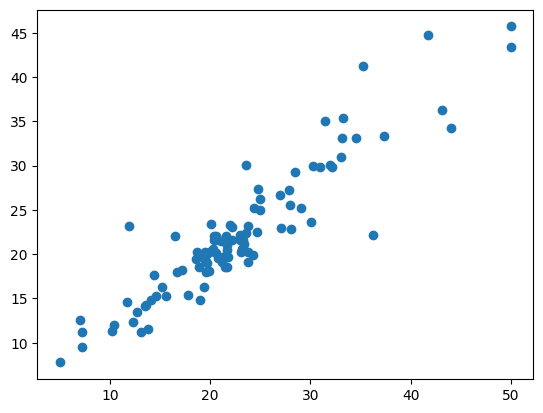

In [44]:
plt.scatter(y_test, y_pred)